# Trabalho computacional - Dataset Fashion MNIST

Utilizo a biblioteca MLDatasets, que já tem o dataset que quero utilizar:

In [1]:
using MLDatasets

Leio os dados de treino e de teste:

In [2]:
# load full training set
train_x, train_y = FashionMNIST.traindata();

In [3]:
# load full test set
test_x,  test_y  = FashionMNIST.testdata();

In [4]:
using ImageCore
using Plots
using StatsBase
using StatsPlots

## Parte 1: Introdução

Minha base de dados contém várias imagens de peças de roupas separadas em 10 diferentes categorias, que são:

In [5]:
FashionMNIST.classnames()

10-element Array{String,1}:
 "T-Shirt"   
 "Trouser"   
 "Pullover"  
 "Dress"     
 "Coat"      
 "Sandal"    
 "Shirt"     
 "Sneaker"   
 "Bag"       
 "Ankle boot"

Cada imagem está em escala de cinza e tem dimensão 28x28, por exemplo a imagem:

In [6]:
FashionMNIST.convert2image(FashionMNIST.traintensor(1))

Cuja matriz de valores é:

In [7]:
FashionMNIST.traintensor(1)

28×28 reinterpret(N0f8, ::Array{UInt8,2}):
 0.0  0.0  0.0  0.0    0.0    0.0    0.0    …  0.0    0.008  0.0    0.0  0.0
 0.0  0.0  0.0  0.0    0.0    0.0    0.0       0.0    0.0    0.0    0.0  0.0
 0.0  0.0  0.0  0.0    0.0    0.0    0.0       0.29   0.0    0.0    0.0  0.0
 0.0  0.0  0.0  0.0    0.0    0.0    0.0       0.741  0.0    0.0    0.0  0.0
 0.0  0.0  0.0  0.0    0.0    0.0    0.0       0.831  0.259  0.0    0.0  0.0
 0.0  0.0  0.0  0.0    0.0    0.0    0.0    …  0.749  0.784  0.0    0.0  0.0
 0.0  0.0  0.0  0.0    0.0    0.0    0.0       0.686  0.871  0.0    0.0  0.0
 0.0  0.0  0.0  0.0    0.0    0.0    0.0       0.675  0.929  0.157  0.0  0.0
 0.0  0.0  0.0  0.0    0.0    0.0    0.0       0.686  0.937  0.239  0.0  0.0
 0.0  0.0  0.0  0.0    0.0    0.0    0.0       0.71   0.949  0.173  0.0  0.0
 0.0  0.0  0.0  0.0    0.0    0.0    0.0    …  0.725  0.965  0.282  0.0  0.0
 0.0  0.0  0.0  0.0    0.0    0.0    0.0       0.737  0.953  0.161  0.0  0.0
 0.0  0.0  0.0  0.004  0.012  0.0

E classe:

In [8]:
FashionMNIST.trainlabels(1)

9

Cujo nome é:

In [9]:
FashionMNIST.classnames()[FashionMNIST.trainlabels(1)+1]

"Ankle boot"

O total de dados de treinamento é:

In [10]:
length(train_y)

60000

E de teste é:

In [11]:
length(test_y)

10000

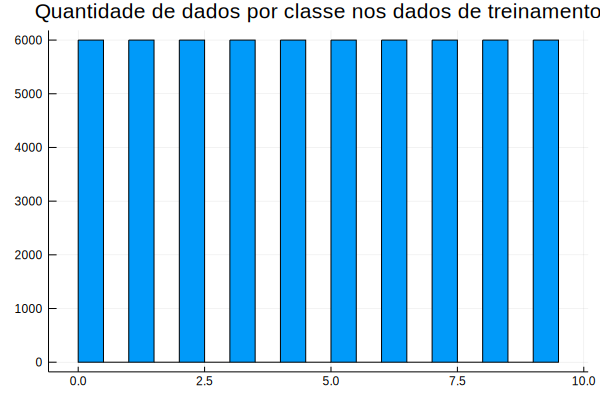

In [12]:
histogram(train_y, legend=false, title = "Quantidade de dados por classe nos dados de treinamento")

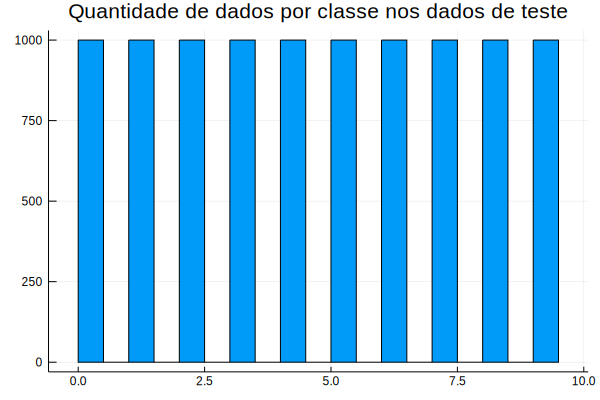

In [13]:
histogram(test_y, legend=false, title = "Quantidade de dados por classe nos dados de teste")

## Parte 2: Metodologia

Uma função que vou utulizar bastante é:

In [14]:
FashionMNIST.convert2features(FashionMNIST.traintensor(1))

784-element reshape(reinterpret(N0f8, ::Array{UInt8,2}), 784) with eltype Normed{UInt8,8}:
 0.0N0f8
 0.0N0f8
 0.0N0f8
 0.0N0f8
 0.0N0f8
 0.0N0f8
 0.0N0f8
 0.0N0f8
 0.0N0f8
 0.0N0f8
 0.0N0f8
 0.0N0f8
 0.0N0f8
 ⋮      
 0.0N0f8
 0.0N0f8
 0.0N0f8
 0.0N0f8
 0.0N0f8
 0.0N0f8
 0.0N0f8
 0.0N0f8
 0.0N0f8
 0.0N0f8
 0.0N0f8
 0.0N0f8

Ela apenas pega a matrix que representa uma imagem, nesse caso a primeira dos dados de treinamento, e a transforma num array.

Caso eu passe o argumento $FashionMNIST.traintensor()$, ela fará isso para todas as imagens de treinamento.

### 2.1: k-NN

### 2.1.1 Com duas classes

Quero encontrar uma função que consiga classificar uma imagem como sendo uma camiseta (T-shirt) ou não-camiseta.

Assim, crio um novo vetor de y tal que $y_i = +1$ se a imagem $i$ é de uma camiseta e $y_i = -1$ caso contrário.

In [15]:
train_y_shirt = copy(train_y)

for i in 1:length(train_y_shirt)
    if train_y[i] == 0
        train_y_shirt[i] = 1
    else
        train_y_shirt[i] = -1
    end
end

In [16]:
test_y_shirt = copy(test_y)

for i in 1:length(test_y)
    if test_y[i] == 0
        test_y_shirt[i] = 1
    else
        test_y_shirt[i] = -1
    end
end

Checo se funcionou para os 10 primeiros valores:

In [17]:
train_y[1:10]

10-element Array{Int64,1}:
 9
 0
 0
 3
 0
 2
 7
 2
 5
 5

In [18]:
train_y_shirt[1:10]

10-element Array{Int64,1}:
 -1
  1
  1
 -1
  1
 -1
 -1
 -1
 -1
 -1

Defino minha função de predição pelo método k-NN (a função foi adaptada da que escrevi para o trabalho de k-NN, só que agora ao invés de estimar um valor estima uma classe).

In [26]:
function predict_knn(X_train, y_train, x_test, k)
    # create list for distances and targets
    distances = []
    sum_y = 0
    for i in 1:size(X_train)[1]
        # first we compute the euclidean distance
        distance = (sum((x_test[j] - X_train[i, j])^2 for j in 1:length(x_test)))^0.5
        # add it to list of distances
        push!(distances, [distance, i])
    end

    # sort the list
    sort!(distances, by = x -> x[1])

    # make a list of the k neighbors' targets
    for i in 1:k
        index = convert(Int, distances[i][2])[1]
        sum_y += y_train[index]
    end

    # return sign of sum of closest y
    return sign(sum_y)
end

predict_knn (generic function with 1 method)

Para um ponto qualquer de teste e k = 3 arbitrário tenho:

In [27]:
predict_knn(FashionMNIST.convert2features(FashionMNIST.traintensor()), train_y_shirt,
        FashionMNIST.convert2features(FashionMNIST.testtensor(1)), 3)

-1

Assim a função passa no teste de sanidade, já que a primeira imagem dos dados de teste é:

In [28]:
FashionMNIST.convert2image(FashionMNIST.testtensor(1))

Cuja classe é:

In [29]:
test_y[1]

9

In [30]:
FashionMNIST.classnames()[test_y[1]+1]

"Ankle boot"

Que não é uma camiseta.

Agora defino a função que faz a predição para um vetor de imagens de teste:

In [31]:
function kNearestNeighbor(X_train, y_train, X_test, k)
    predictions = []
    
    # check if k larger than n
    if k > length(X_train)
        println("O número de pontos deve ser maior que k")
        return 
    end

    # predict for each testing observation
    for i in 1:size(X_test)[2]
        append!(predictions, predict_knn(X_train, y_train, X_test[:, i], k))
    end
    return predictions
end

kNearestNeighbor (generic function with 1 method)

Defino a função de erro para as predições:

In [57]:
function error_f(y_test, y_predicted)
    sum_error = 0
    for i in 1:length(y_test)
        if y_test[i] != y_predicted[i]
            sum_error +=1
        end
    end
    return sum_error/length(y_test)
end

error_f (generic function with 1 method)

Defino minha função de cross-validation para o k-NN:

In [36]:
function cross_validation(X_train, Y_train, K, folds)
    
    error = []  
    i = 0
    
    size_train = size(X_train, 2)
    size_part = convert(Int, floor(size_train/folds))
    print("Size_train = ")
    println(size_train)
    print("Size_part = ")
    println(size_part)
    
    while i < length(K)
        for part in 1:folds
            elements_part = [x for x in 1:size_train if x<=(part-1)*size_part || x>part*size_part]
                        
            i += 1

            print("Iteração: ")
            println(length(error)+1)
            print("   k = ")
            println(K[i])
            print("   Partição = ")
            println((part-1)*size_part+1:part*size_part)

            X_test_aux = X_train[:,(part-1)*size_part+1:part*size_part]
            X_train_aux = X_train[:,elements_part]

            Y_test_aux = Y_train[(part-1)*size_part+1:part*size_part]
            Y_train_aux = Y_train[elements_part] 

            @time Y_predicted_aux = kNearestNeighbor(X_train_aux, Y_train_aux, X_test_aux, K[i])

            e = error_f(Y_test_aux, Y_predicted_aux)
            print("   Erro = ")
            println(e)

            append!(error, e)

        end
    end
    
    return error
end

cross_validation (generic function with 1 method)

In [37]:
errors_cv = cross_validation(FashionMNIST.convert2features(FashionMNIST.traintensor()), train_y_shirt,
                            [i for i in 3:17], 5)

Size_train = 60000
Size_part = 12000
Iteração: 0
   k = 3
   Partição = 1:12000
106.432438 seconds (63.27 M allocations: 2.439 GiB, 0.47% gc time)
   Erro = 0.09933333333333333
Iteração: 1
   k = 4
   Partição = 12001:24000
106.332504 seconds (63.21 M allocations: 2.436 GiB, 0.45% gc time)
   Erro = 0.10875
Iteração: 2
   k = 5
   Partição = 24001:36000
109.744809 seconds (63.23 M allocations: 2.436 GiB, 0.44% gc time)
   Erro = 0.1015
Iteração: 3
   k = 6
   Partição = 36001:48000
116.579183 seconds (63.24 M allocations: 2.436 GiB, 0.44% gc time)
   Erro = 0.10033333333333333
Iteração: 4
   k = 7
   Partição = 48001:60000
109.834234 seconds (63.26 M allocations: 2.437 GiB, 0.45% gc time)
   Erro = 0.10316666666666667
Iteração: 5
   k = 8
   Partição = 1:12000
111.147311 seconds (63.28 M allocations: 2.437 GiB, 0.44% gc time)
   Erro = 0.09425
Iteração: 6
   k = 9
   Partição = 12001:24000
116.496517 seconds (63.30 M allocations: 2.437 GiB, 0.45% gc time)
   Erro = 0.10216666666666667


15-element Array{Any,1}:
 0.09933333333333333
 0.10875            
 0.1015             
 0.10033333333333333
 0.10316666666666667
 0.09425            
 0.10216666666666667
 0.10158333333333333
 0.09975            
 0.103              
 0.0935             
 0.10216666666666667
 0.10158333333333333
 0.09975            
 0.103              

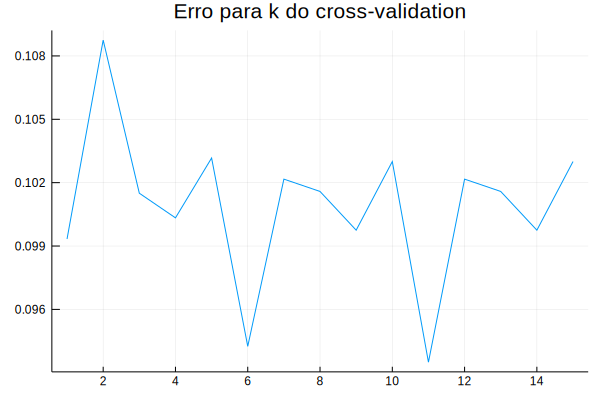

In [40]:
plot(errors_cv, legend = false, title = "Erro para k do cross-validation")

In [47]:
error_cv = mean(errors_cv)

0.10092222222222222

Assim, escolho $k = 11$.

In [41]:
k = 11

11

In [53]:
@time predicted_y_train = kNearestNeighbor(FashionMNIST.convert2features(FashionMNIST.traintensor()), train_y_shirt, 
                            FashionMNIST.convert2features(FashionMNIST.traintensor()), k)

1499.490263 seconds (316.66 M allocations: 12.275 GiB, 0.23% gc time)


60000-element Array{Any,1}:
 -1
 -1
 -1
 -1
 -1
 -1
 -1
 -1
 -1
 -1
 -1
 -1
 -1
  ⋮
 -1
 -1
 -1
 -1
 -1
 -1
 -1
 -1
 -1
 -1
 -1
 -1

In [54]:
error_train = error_f(train_y_shirt, predicted_y_train)

0.1

In [55]:
@time predicted_y = kNearestNeighbor(FashionMNIST.convert2features(FashionMNIST.traintensor()),
                                     train_y_shirt, FashionMNIST.convert2features(FashionMNIST.testtensor()), k)

252.093784 seconds (52.78 M allocations: 2.083 GiB, 0.28% gc time)


10000-element Array{Any,1}:
 -1
 -1
 -1
 -1
 -1
 -1
 -1
 -1
 -1
 -1
 -1
 -1
 -1
  ⋮
 -1
 -1
 -1
 -1
 -1
 -1
 -1
 -1
 -1
 -1
 -1
 -1

In [58]:
error_test = error_f(test_y_shirt, predicted_y)

0.1

### 2.1.1 Com dez classes

Agora a intenção é encontrar uma função para classificar uma imagem em uma das dez classes de tipos de roupa.

Assim, voltaremos a utilizar os dados normais de $y$.

Para isso, preciso modificar minha função de predição para que considere as várias camadas:

In [66]:
function predict_knn_multiclass(X_train, y_train, x_test, k)
    
    distances = []
    sum_y = 0
    classes = zeros(10)
    
    for i in 1:size(X_train)[1]
        distance = (sum((x_test[j] - X_train[i, j])^2 for j in 1:length(x_test)))^0.5
        push!(distances, [distance, i])
    end

    sort!(distances, by = x -> x[1])

    for i in 1:k
        index = convert(Int, distances[i][2])[1]
        classes[y_train[index]] += 1
    end
    
    more_votes = 0
    class_m = 0
    
    for class in 1:10
        if classes[class] > more_votes
            more_votes = classes[class]
            class_m = class
        end
    end

    return class_m
end

predict_knn_multiclass (generic function with 1 method)

In [60]:
function kNearestNeighbor_Multiclass(X_train, y_train, X_test, k)
    predictions = []
    
    # check if k larger than n
    if k > length(X_train)
        println("O número de pontos deve ser maior que k")
        return 
    end

    # predict for each testing observation
    for i in 1:size(X_test)[2]
        append!(predictions, predict_knn_multiclass(X_train, y_train, X_test[:, i], k))
    end
    return predictions
end

kNearestNeighbor_Multiclass (generic function with 1 method)

In [68]:
function cross_validation_knnm(X_train, Y_train, K, folds)
    
    error = []  
    i = 0
    
    size_train = size(X_train, 2)
    size_part = convert(Int, floor(size_train/folds))
    print("Size_train = ")
    println(size_train)
    print("Size_part = ")
    println(size_part)
    
    while i < length(K)
        for part in 1:folds
            elements_part = [x for x in 1:size_train if x<=(part-1)*size_part || x>part*size_part]
                        
            i += 1

            print("Iteração: ")
            println(length(error)+1)
            print("   k = ")
            println(K[i])
            print("   Partição = ")
            println((part-1)*size_part+1:part*size_part)

            X_test_aux = X_train[:,(part-1)*size_part+1:part*size_part]
            X_train_aux = X_train[:,elements_part]

            Y_test_aux = Y_train[(part-1)*size_part+1:part*size_part]
            Y_train_aux = Y_train[elements_part] 

            @time Y_predicted_aux = kNearestNeighbor_Multiclass(X_train_aux, Y_train_aux, X_test_aux, K[i])

            e = error_f(Y_test_aux, Y_predicted_aux)
            print("   Erro = ")
            println(e)

            append!(error, e)

        end
    end
    
    return error
end

cross_validation_knnm (generic function with 1 method)

### 2.2 SVM

In [40]:
using LIBSVM

In [41]:
@time model_svm = svmtrain(FashionMNIST.convert2features(FashionMNIST.traintensor()), train_y_shirt);

...
*.*
optimization finished, #iter = 4401
nu = 0.107581
obj = -6046.288241, rho = -2.585660
nSV = 6546, nBSV = 6377
Total nSV = 6546


In [54]:
predicted_label = []

@time for i in 1:2:length(test_y)
    (pred_aux, decision_values) = svmpredict(model_svm, FashionMNIST.convert2features(FashionMNIST.testtensor(i:(i+1))))
    append!(predicted_label, pred_aux[1])
    append!(predicted_label, pred_aux[2])
end

In [55]:
predicted_label

10000-element Array{Any,1}:
 -1
 -1
 -1
 -1
 -1
 -1
 -1
 -1
 -1
 -1
 -1
 -1
 -1
  ⋮
 -1
 -1
 -1
 -1
 -1
 -1
 -1
 -1
 -1
 -1
 -1
 -1

In [58]:
error_test = error_f(test_y_shirt, predicted_label)

0.0426

### 2.3 Rede neural

In [32]:
ENV["TF_USE_GPU"] = "1"
Pkg.build("TensorFlow")

  Building Arpack ──────────→ `C:\Users\vivig\.julia\packages\Arpack\cu5By\deps\build.log`
  Building SpecialFunctions → `C:\Users\vivig\.julia\packages\SpecialFunctions\fvheQ\deps\build.log`
  Building Rmath ───────────→ `C:\Users\vivig\.julia\packages\Rmath\Py9gH\deps\build.log`
  Building Conda ───────────→ `C:\Users\vivig\.julia\packages\Conda\kLXeC\deps\build.log`
  Building MbedTLS ─────────→ `C:\Users\vivig\.julia\packages\MbedTLS\X4xar\deps\build.log`
  Building PyCall ──────────→ `C:\Users\vivig\.julia\packages\PyCall\ttONZ\deps\build.log`
  Building CodecZlib ───────→ `C:\Users\vivig\.julia\packages\CodecZlib\9jDi1\deps\build.log`
  Building TensorFlow ──────→ `C:\Users\vivig\.julia\packages\TensorFlow\q9pY2\deps\build.log`


In [35]:
using TensorFlow

ErrorException: Failed to precompile TensorFlow [1d978283-2c37-5f34-9a8e-e9c0ece82495] to C:\Users\vivig\.julia\compiled\v1.1\TensorFlow\IhIhf.ji.

In [34]:
using FFTW